<a href="https://colab.research.google.com/github/AronAhn/tf_udemy/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [0]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

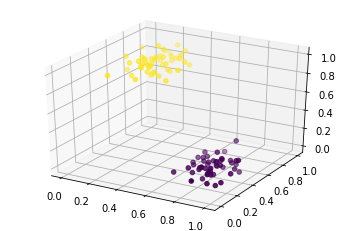

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(data_x, data_y, data_z, c=data[1])

In [8]:
tf.__version__

'1.15.0'

In [0]:
from tensorflow.contrib.layers import fully_connected
num_inputs = num_outputs = 3
num_hidden = 2
learning_rate = 0.01

In [0]:
X = tf.compat.v1.placeholder(tf.float32, shape=[None, num_inputs])

In [11]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
loss = tf.reduce_mean(tf.square(outputs-X))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
num_steps = 1000
with tf.Session() as sess:
  
  sess.run(init)

  for iter in range(num_steps):
    sess.run(train, feed_dict={X:scaled_data})

  output_2d = hidden.eval(feed_dict={X:scaled_data})

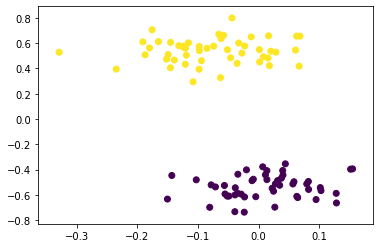

In [15]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c=data[1])

### Linear Autoencoder for PCA - EXERCISE

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/udemy_tf/FULL-TENSORFLOW-NOTES-AND-DATA/05-Autoencoders/anonymized_data.csv")

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Label', axis=1))

In [0]:
from tensorflow.contrib.layers import fully_connected

In [0]:
num_inputs = num_outputs = 30
num_hidden = 2
learning_rate = 0.01

In [0]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

loss = tf.reduce_mean(tf.square(outputs-X))

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [0]:
num_steps = 2000
with tf.Session() as sess:
  sess.run(init)

  for iter in range(num_steps):
    sess.run(train, feed_dict={X:scaled_data})
    
with tf.Session() as sess:
  sess.run(init)
  output_2d = hidden.eval(feed_dict={X:scaled_data})

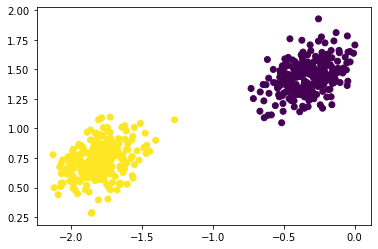

In [30]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=df['Label'])

### Stacked Autoencoder

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [34]:
mnist = input_data.read_data_sets("/content/drive/My Drive/udemy_tf/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Extracting /content/drive/My Drive/udemy_tf/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/udemy_tf/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /content/drive/My Drive/udemy_tf/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/udemy_tf/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
tf.reset_default_graph()

In [0]:
# 784 -> 392 -> 196 -> 392 -> 784
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

learning_rate = 0.01
actf = tf.nn.relu

In [0]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [0]:
act_func = tf.nn.relu
hid_layer1 = act_func(tf.matmul(X, w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3, w4)+b4)

In [0]:
loss = tf.reduce_mean(tf.square(output_layer - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [50]:
saver = tf.train.Saver()

num_epochs = 20
batch_size = 100

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(num_epochs):
    num_batches = mnist.train.num_examples // batch_size
    for iter in range(num_batches):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(train, feed_dict={X:X_batch})

    training_loss = loss.eval(feed_dict={X:X_batch})

    print("EPOCH: {} LOSS: {}".format(epoch, training_loss))

  saver.save(sess, "example_stacked_autencoder.ckpt")

EPOCH: 0 LOSS: 0.02503172494471073
EPOCH: 1 LOSS: 0.02635883539915085
EPOCH: 2 LOSS: 0.022952649742364883
EPOCH: 3 LOSS: 0.02481388859450817
EPOCH: 4 LOSS: 0.024870334193110466
EPOCH: 5 LOSS: 0.02490142546594143
EPOCH: 6 LOSS: 0.023175593465566635
EPOCH: 7 LOSS: 0.021962296217679977
EPOCH: 8 LOSS: 0.02304542437195778
EPOCH: 9 LOSS: 0.02230399288237095
EPOCH: 10 LOSS: 0.025099148973822594
EPOCH: 11 LOSS: 0.020527612417936325
EPOCH: 12 LOSS: 0.023640429601073265
EPOCH: 13 LOSS: 0.022989723831415176
EPOCH: 14 LOSS: 0.02238597720861435
EPOCH: 15 LOSS: 0.02495850995182991
EPOCH: 16 LOSS: 0.024175692349672318
EPOCH: 17 LOSS: 0.024168778210878372
EPOCH: 18 LOSS: 0.022707628086209297
EPOCH: 19 LOSS: 0.023853952065110207


In [52]:
num_test_images = 10

with tf.Session() as sess:
  saver.restore(sess, 'example_stacked_autencoder.ckpt')
  results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from example_stacked_autencoder.ckpt


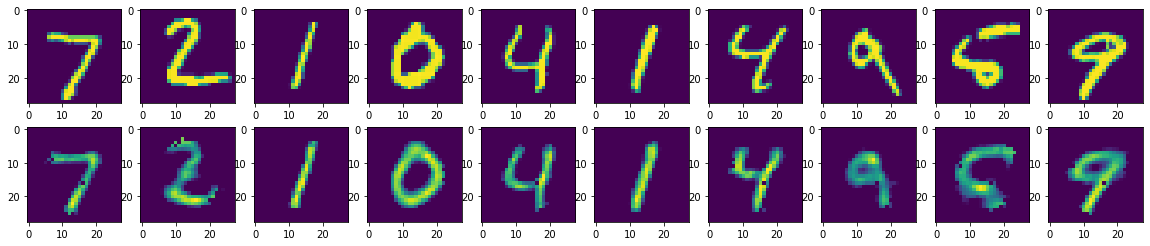

In [53]:
f, a = plt.subplots(2, 10, figsize=(20,4))
for i in range(num_test_images):
  a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  a[1][i].imshow(np.reshape(results[i], (28,28)))